In [1]:
import os
import pandas as pd
import numpy as np 
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "browser"
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

In [2]:
dirpath = os.getcwd()
features_path = r"C:\Users\marie\rep_codes\udder_project\udder_processing\features_dict\gmfeature_table.csv"
data_path = r"C:\Users\marie\rep_codes\udder_project\delpro_vms\data_out"
plot_dir = os.path.join(os.path.normpath(dirpath + os.sep + os.pardir),r"adsa\examples")

color_dict = {'lf': 'cyan', 'rf': 'skyblue', 'lb': 'royalblue', 'rb': 'dodgerblue', 'front':'cyan', 
             'right': 'skyblue', 'left': 'royalblue', 'back': 'dodgerblue', 'udder': 'plum'}

tick_map = {"udder":"udder", "lf": "left\nfront", "rf":"right\nfront", "lb": "left\nrear", "rb":"right\nrear", "right":"right", "left":"left", "front": "front", "back":"rear"}

In [3]:
data = pd.read_csv(features_path)

In [4]:
def list_columns(df, keyword):
    column_list = [col for col in df.columns if keyword in col]
    return column_list

def melt_frame(df, cols):
    selected_df = df[cols]
    # melted_df = pd.melt(df, id_vars=['cow', 'frame'], value_vars=cols)
    melted_df = pd.melt(df, id_vars=['cow'], value_vars=cols)
    return melted_df

def subset_df(df, keyword):
    kkword = '_' + keyword
    col = list_columns(df, keyword)
    melted_df = melt_frame(df, cols)
    melted_df["variable"] = [val.replace(kkword, "") for val in melted_df["variable"]]
    return melted_df
    
def box_fig(df, keyword, xlab, ylab, frac =1):
    kkword = '_' + keyword
    cols = list_columns(df, kkword)
    melted_df = melt_frame(df, cols)
    melted_df["variable"] = [tick_map[val.replace(kkword, "")] for val in melted_df["variable"]]
    melted_df2 = melted_df[~melted_df.variable.isna()]
    group_df = melted_df2
    # group_df = melted_df.drop(["frame"], axis = 1).groupby(["cow", "variable"]).agg(["mean", "median"]).reset_index()
    # group_df.columns = [c[1] if len(c[1])>0 else c[0] for c in group_df.columns]
    fig = sns.boxplot(y = group_df["value"]/frac, x = group_df["variable"], hue = group_df["variable"])
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    # fig.update_layout(xaxis=dict(rangeslider=dict(visible=True)))
    return fig


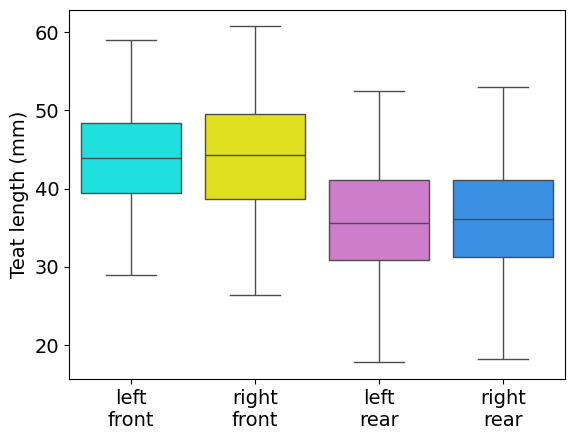

In [5]:

#create your own color array 
my_colors = ["cyan",'yellow','orchid', 'dodgerblue'] 
  
# add color array to set_palette 
# function of seaborn 
sns.set_palette( my_colors ) 
fig = plt.figure(figsize=(6.4, 4.8))
box_fig(data, "len", "", "Teat length (mm)")

plt.savefig(os.path.join(plot_dir, "teat_len_bplot.png"),bbox_inches='tight')

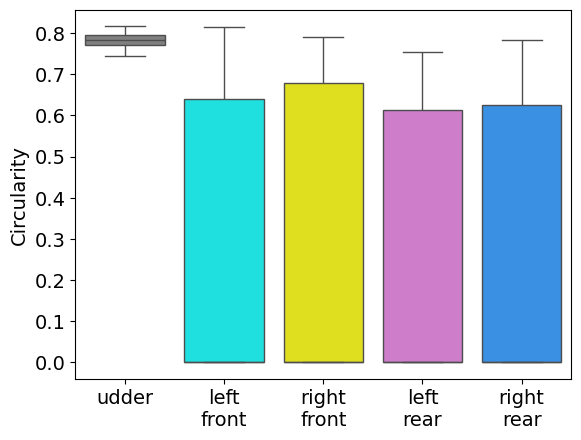

In [6]:
#create your own color array 
my_colors = [ "gray","cyan",'yellow','orchid', 'dodgerblue'] 
  
# add color array to set_palette 
# function of seaborn 
sns.set_palette( my_colors ) 
fig = plt.figure(figsize=(6.4, 4.8))
box_fig(data, "circ", "", "Circularity")
plt.savefig(os.path.join(plot_dir, "circ_bplot.png"),bbox_inches='tight')

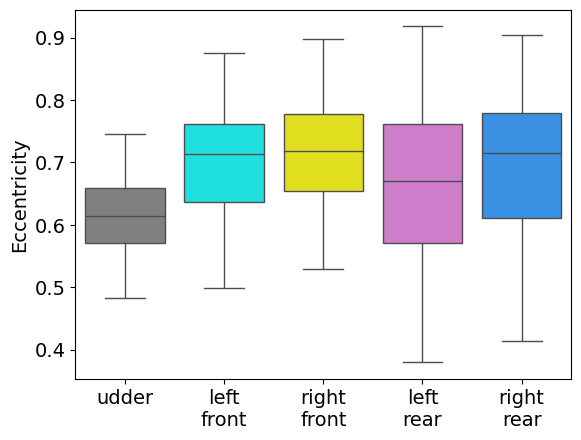

In [7]:
#create your own color array 
my_colors = [ "gray", "cyan",'yellow','orchid', 'dodgerblue'] 
  
  
# add color array to set_palette 
# function of seaborn 
sns.set_palette( my_colors ) 
fig = plt.figure(figsize=(6.4, 4.8))
box_fig(data, "exc", "", "Eccentricity")
plt.savefig(os.path.join(plot_dir, "ecc_bplot.png"),bbox_inches='tight')

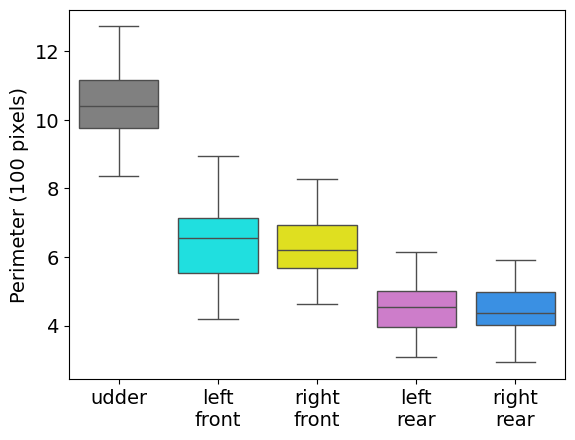

In [14]:
#create your own color array 
my_colors = [ "gray", "cyan",'yellow','orchid', 'dodgerblue'] 
  
  
# add color array to set_palette 
# function of seaborn 
sns.set_palette( my_colors ) 
fig = plt.figure(figsize=(6.4, 4.8))
box_fig(data, "peri", "", "Perimeter (100 pixels)", 100)
plt.savefig(os.path.join(plot_dir, "peri_bplot.png"),bbox_inches='tight')

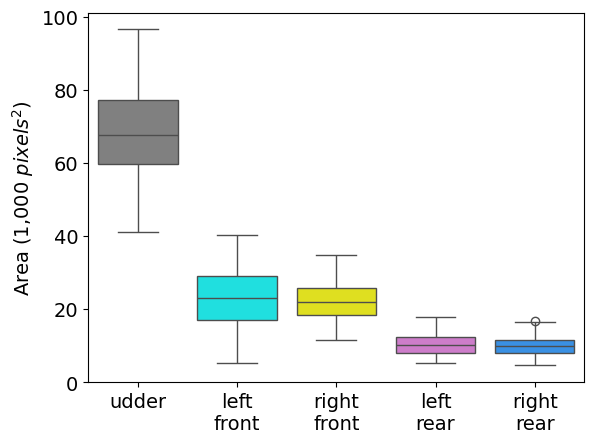

In [15]:
#create your own color array 
my_colors = [ "gray", "cyan",'yellow','orchid', 'dodgerblue'] 
  
  
# add color array to set_palette 
# function of seaborn 
sns.set_palette( my_colors ) 
box_fig(data, "area", "", "Area (1,000 $pixels^2$)", 1000)
plt.savefig(os.path.join(plot_dir, "area_bplot.png"),bbox_inches='tight')

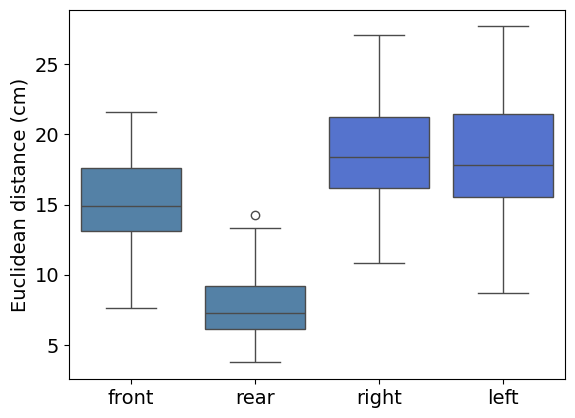

In [17]:
#create your own color array 
my_colors = ["steelblue", "steelblue",  
             "royalblue", "royalblue"] 
  
# add color array to set_palette 
# function of seaborn 
sns.set_palette( my_colors ) 
box_fig(data, "eu", "", "Euclidean distance (cm)")
plt.savefig(os.path.join(plot_dir, "eu_bplot.png"),bbox_inches='tight')

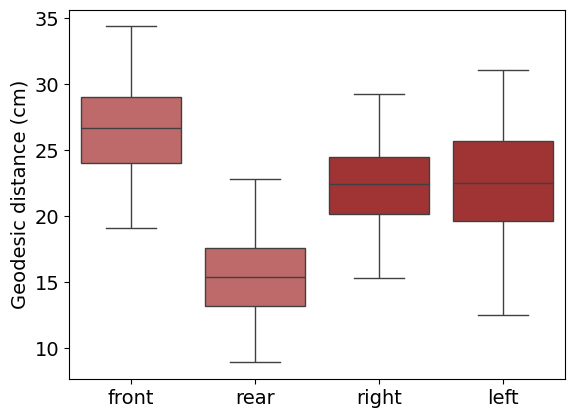

In [16]:
#create your own color array 
my_colors = ["indianred", "indianred",  
             "firebrick", "firebrick"]
  
# add color array to set_palette 
# function of seaborn 
sns.set_palette( my_colors ) 
box_fig(data, "gd", "", "Geodesic distance (cm)")
plt.savefig(os.path.join(plot_dir, "gd_bplot.png"),bbox_inches='tight')

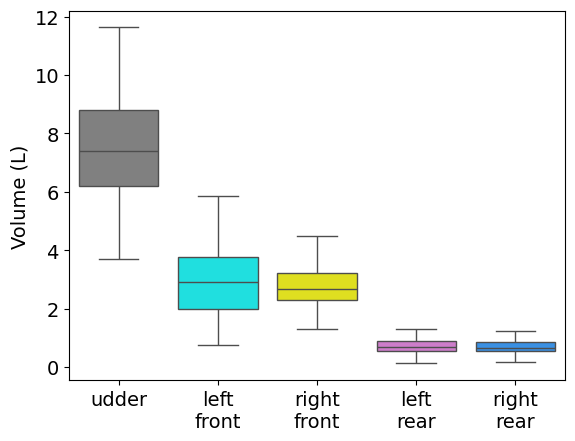

In [19]:
#create your own color array 
my_colors =  [ "gray", "cyan",'yellow','orchid', 'dodgerblue'] 
  
# add color array to set_palette 
# function of seaborn 
sns.set_palette( my_colors ) 
box_fig(data, "vol", "", "Volume (L)")
plt.savefig(os.path.join(plot_dir, "vol_bplot.png"),bbox_inches='tight')

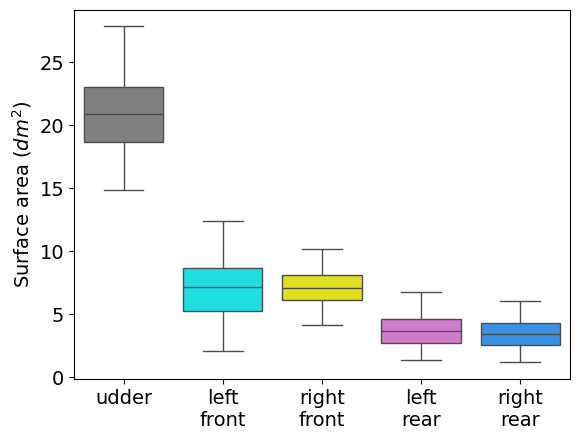

In [18]:
#create your own color array 
my_colors =  [ "gray", "cyan",'yellow','orchid', 'dodgerblue'] 
  
# add color array to set_palette 
# function of seaborn 
sns.set_palette( my_colors ) 
box_fig(data, "sarea", "", "Surface area $(dm^2)$", 100)
plt.savefig(os.path.join(plot_dir, "sarea_bplot.png"),bbox_inches='tight')